In [1]:
import numpy as np
import math
import os
# import imageio
from barrier3d import Barrier3d
from cascade.outwasher_reorg_backwater import Outwasher
from cascade.outwasher_reorganized import (plot_ElevAnimation, plot_DischargeAnimation, plot_SlopeAnimation, 
plot_Qs2Animation, plot_SedOutAnimation, plot_SedInAnimation)
import matplotlib.pyplot as plt
import imageio
import csv

In [2]:
with open(r"C:\Users\Lexi\Documents\Research\Outwasher\chris stuff\sound_data.txt", newline='') as csvfile:
    sound_data = list(csv.reader(csvfile))[0]
sound_data = [float(s) / 10 - 0.054 for s in sound_data]  # [dam MHW] Chris' sound elevations were in m MSL,
# so converted to NAVD88 then MHW and dam
sound_data = [s + 0.05 for s in sound_data]  # [dam MHW] just increasing the values
# setting all negative values to 0
sound_data = sound_data[20:]
# for index, value in enumerate(sound_data):
#     #     # smaller used 0.05
#     if value > 0.220:
#         sound_data[index] = 0.220
sound_data[0] = 0

<div class="alert alert-block alert-info"><b>Configuration:</b> Substep = 2, Cx = 10, Ki = 7.5x10$^{-3}$.
    calculate rexcess as the average difference between the bay elevations and the dune toe
</div>

In [3]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()

path = "C:/Users/Lexi/Documents/Research/Outwasher/Output/edgesedited_bay220limited/discharge_comp/"
runID = "no_dune_erosion_backwater_fullhydro_Kie-3_substep2"
newpath = path + runID + "/"
# storm series is year the storm occured, the bay elevation for every time step, and the duration of the storm
storm_series = [1, sound_data, len(sound_data)]

outwash = Outwasher(b3d, runID, path, substep=2, Cx=10, Ki=7.5E-3,)
discharge, elev_change, domain, qs_lost, slopes2, dictionary, qs2, storm_data, sedout, sedin, domain_array, OW_TS \
    = outwash.update(storm_series, b3d, fudge_fac=1)

0
1
2
3
4
5
6
Starting discharge is: 112.60589194763732
discharge at dune gaps after flow routing: [36.30875612 64.29935454 55.67069632 59.96550156 60.38309074 62.88833591
 50.19207451 54.72600223 54.13820122 58.24537238 52.9786735  60.25055602
 53.57717427 58.33437118 54.49098316 54.22779539 48.82475995 55.56492855
 59.46233645 49.23833678 62.41283408 60.04197672 57.93961183 55.22063214
 51.85041068 55.5407558  60.55952916 49.56334801 57.69874116 53.11782613
 47.69545839 59.48957205 56.79503995 58.95719029 63.16127351 56.32809194
 45.7559293  51.89600518 57.48248243 59.95147229 61.2260008  47.18951597
 61.45853209 53.18328845 56.0271389  50.69731921 62.0423138  52.41800864
 63.51396306 39.33815819]
7
Starting discharge is: 138.8286738971494
discharge at dune gaps after flow routing: [  0.         152.9844206   53.09214256  80.10024629  78.88328214
 168.7268611   17.16786769  28.58603227  32.57088379 187.47549891
   0.         179.5460201    0.         133.4699921  127.78837161
   0.  

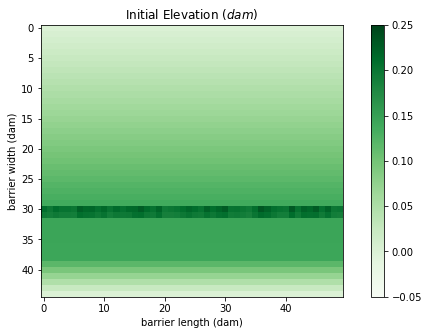

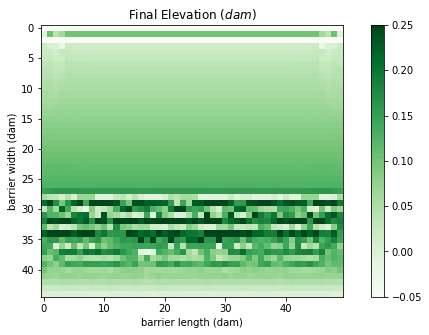

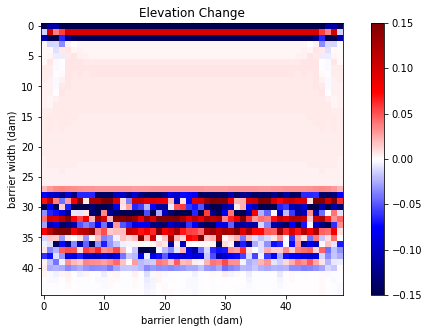

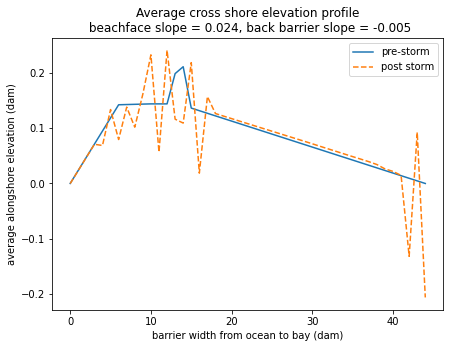

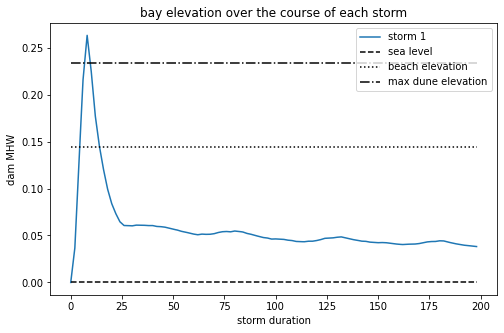

[ * elevation GIF successfully generated * ]

[ * discharge GIF successfully generated * ]

[ * slope GIF successfully generated * ]

[ * SedOut GIF successfully generated * ]

[ * SedIn GIF successfully generated * ]


In [4]:
initial_domain = domain_array[0]
final_domain = domain_array[1]

plt.rcParams['figure.figsize'] = (10,5)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain,
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
fig1.colorbar(mat)
ax1.set_title("Initial Elevation $(dam)$")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Elevation after storm {0} $(dam)$".format(n + 1))
ax2.set_title("Final Elevation $(dam)$")
plt.gca().xaxis.tick_bottom()
fig2.colorbar(mat2)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change,
    # origin="upper",
    cmap="seismic",
    vmin=-0.15, vmax=0.15,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
fig3.colorbar(mat3)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')

plt.rcParams['figure.figsize'] = (7,5)


### AVERAGE ELEVATION PLOT------------------------------------------------------------------------------------------------------
# plotting pre-storm cross section for row 21 (a gap where overwash occurs)
cross_section = np.mean(initial_domain, 1)
cross_section = np.flip(cross_section)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(range(len(initial_domain)), cross_section, label="pre-storm")


# plotting post-storm cross section
m_beach = 0.0004
cross_section2 = np.mean(final_domain, 1)
cross_section2 = np.flip(cross_section2)
ax4.plot(range(len(final_domain)), cross_section2, label="post storm", linestyle="dashed")
# dune_gap_el = np.flip(full_domain[:, 21])
# ax4.plot(range(len(full_domain)), dune_gap_el, label="dune gap (21) post", linestyle="dashed")
ax4.set_xlabel("barrier width from ocean to bay (dam)")
ax4.set_ylabel("average alongshore elevation (dam)")
# ax4.set_title("Cross shore elevation profile for col 21\n "
#               "beachface slope = {0}, back barrier slope = {1}".format(round(m_beachface, 3), round(Si, 3)))
ax4.set_title("Average cross shore elevation profile\n "
              "beachface slope = {0}, back barrier slope = {1}".format(round(outwash._m_beachface, 3),
                                                                       round(outwash._Si, 3)))
ax4.legend()
plt.show()
# plt.savefig(newpath + "cross_shore_21")
fig4.savefig(newpath + "avg_cross_shore", facecolor='w')

### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
plt.rcParams['figure.figsize'] = (8,5)

numstorm = storm_series[0]
x = range(0, storm_series[2])
sea_level_line = outwash._sea_level * np.ones(len(x))
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._dune_crest + outwash._berm_el) * np.ones(len(x))

for n in range(numstorm):
    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    ax5.plot(x, storm_series[1], label='storm {0}'.format(n + 1))
    # if we have multiple storms, will only need to plot these once
    ax5.plot(x, sea_level_line, 'k', linestyle='dashed', label='sea level')
    ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='beach elevation')
    ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
    ax5.set_xlabel("storm duration")
    ax5.set_ylabel("dam MHW")
    ax5.set_title("bay elevation over the course of each storm")
    ax5.legend()
    plt.show()
    fig5.savefig(newpath + "hydrograph", facecolor='w')
    plt.close()
    
### GIFS------------------------------------------------------------------------------------------------------------------------

start = OW_TS[0]
stop = OW_TS[-1]
dir = newpath
plot_ElevAnimation(elev_change, dir, start, stop)
plot_DischargeAnimation(discharge, dir, start, stop)
plot_SlopeAnimation(slopes2, dir, start, stop)
# plot_Qs2Animation(qs2, dir, TMAX)
plot_SedOutAnimation(sedout, dir, start, stop)
plot_SedInAnimation(sedin, dir, start, stop)
# time_step = [0]
# plot_ModelTransects(b3d, time_step)

<div class="alert alert-block alert-info"><b>Configuration:</b> Substep = 20, Cx = 10, Ki = 7.5x10$^{-3}$.
</div>

In [5]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()

path = "C:/Users/Lexi/Documents/Research/Outwasher/Output/edgesedited_bay220limited/discharge_comp/"
runID = "no_dune_erosion_backwater_fullhydro_Kie-3_substep20"
newpath = path + runID + "/"
# storm series is year the storm occured, the bay elevation for every time step, and the duration of the storm
storm_series = [1, sound_data, len(sound_data)]

outwash = Outwasher(b3d, runID, path, substep=20, Cx=10, Ki=7.5E-3,)
discharge, elev_change, domain, qs_lost, slopes2, dictionary, qs2, storm_data, sedout, sedin, domain_array, OW_TS \
    = outwash.update(storm_series, b3d, fudge_fac=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
Starting discharge is: 77.41648823971731
discharge at dune gaps after flow routing: [24.96224969 44.20577057 38.27357284 41.22624905 41.51334138 43.23569605
 34.50702338 37.62409617 37.2199833  40.04366119 36.42280864 41.42222384
 36.83427759 40.10484782 37.46252069 37.28157925 33.56699538 38.20085755
 40.88032332 33.85132922 42.9087888  41.27882568 39.83345099 37.96415396
 35.64712858 38.1842388  41.6346427  34.07477426 39.66785254 36.51847599
 32.79060118 40.89904778 39.04655846 40.53303561 43.4233405  38.72553196
 31.45717601 35.67847477 39.51917478 41.21660394 42.09284158 32.44276605
 42.25270672 36.56348131 38.51862691 34.85437883 42.65405632 36.03735186
 43.66581436 27.04496193]
57
Starting discharge is: 84.71919758814286
discharge at dune gaps after flow routing: [27.17834978 49.6654387  41.92597881 45.37756938 45.759927

discharge at dune gaps after flow routing: [  0.         244.85079313   5.69712849  34.73632401  68.5720537
 318.58615288  28.28414434   0.         160.33747102   0.
   0.         381.67600545   0.           0.         237.94188188
  17.23779466   5.48028534  30.88521396 244.58011413   0.
 299.04017886   0.         147.36661489  12.32745295   4.97331321
  22.35907018 372.65891619   0.         144.122473     0.
   0.         251.07950451   0.           0.         360.61075531
  51.90287367   2.43093244   5.66980511 125.00544344   0.
 308.27385143   0.         238.60331654  31.46899307  25.24340259
  22.5022111  132.40930032   0.         307.17183936   0.        ]
69
Starting discharge is: 166.95915182414504
discharge at dune gaps after flow routing: [0.00000000e+00 3.44370309e+02 1.00070690e+01 1.63680606e+01
 1.98173772e+01 3.50978539e+02 0.00000000e+00 0.00000000e+00
 1.70731311e+02 4.18385710e+01 2.63941226e+01 3.47496610e+02
 0.00000000e+00 0.00000000e+00 2.47217512e+02 4.78901381e+

discharge at dune gaps after flow routing: [  0.         520.87741053   0.         119.25624622 175.25930639
  57.47578356   0.           0.         526.42224985  45.55208987
  62.67657336 118.64602182  51.83118307  29.51060818 427.82190255
   0.           0.         154.09905966 285.26828115   0.
 393.52959401   0.         417.18050553   0.           0.
 139.1678378  217.76999443   0.         433.72352713  21.94420873
  11.71867802  40.85391937 133.00691842 281.56455321 172.38265608
 194.62725081   0.           0.         365.38204285   0.
 526.35300998   2.73973674 151.37471012 109.36894627  29.99106548
   0.         378.33511989   0.         325.32938061   0.        ]
81
Starting discharge is: 252.34506693538438
discharge at dune gaps after flow routing: [  0.         388.36631758   0.         123.61851757 316.77667555
  75.14038995   0.           0.         444.8363904    0.
  17.58376645 237.12800513  95.32436299  75.7440064  347.51448959
   0.           0.         112.2156289  43

discharge at dune gaps after flow routing: [151.62262679 145.73969031   0.          77.89569265 295.40513415
  74.72353391  20.28666496  61.7163783  177.36433297 128.25018618
   0.         131.28411089 135.18798918 170.57869581  95.42918111
   0.           0.         104.01115432 181.82694485   0.
 209.71766569   0.         350.79526326   7.62385913   0.
  67.55246127 356.06718084   0.           0.         336.89080694
   0.          37.55818162  20.89646986 185.55884876 197.67780096
 229.426127     3.46701285   5.83024086 255.25215214  55.31987646
 239.4057756    7.28955324   0.         166.64453125   0.
   0.         467.47399436   0.         184.01508859   0.        ]
93
Starting discharge is: 208.2426694119845
discharge at dune gaps after flow routing: [256.23956912 102.7789652    0.          63.83133981 155.23537252
  60.56406589   0.         172.33571632 142.71352964 211.7265364
   0.           0.         184.7245828  240.05423096  66.11363553
   0.           0.         300.20485

discharge at dune gaps after flow routing: [113.13745712  92.73853191   0.          48.19800427 166.0542069
 152.28049131   0.          34.17579963  34.99932826 122.99683056
   0.         295.69088214   0.         100.2860295  272.16082501
   0.           0.          39.24595471  60.86958192  24.47059197
 222.83964181  54.99983797 212.42939814   9.87772694   0.
  25.68286833 207.00917785  19.92426595  44.7848457  183.07882613
   0.          24.17869433  27.33774343 121.38041709 234.97613943
 209.91201664   0.           0.          75.22448907 113.65441112
 128.83903135   0.          96.92827834  84.87572355   0.
   0.         442.87460983   0.          67.76375423   0.        ]
105
Starting discharge is: 165.8322332560515
discharge at dune gaps after flow routing: [135.85682681 115.91363479   0.          33.72541505 153.11901244
 131.29975691   0.          47.97726493  44.60674975  84.18994368
   0.         237.42780763  41.5405716  115.81851766 175.45605587
   0.           0.         

1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605


In [ ]:
initial_domain = domain_array[0]
final_domain = domain_array[1]

plt.rcParams['figure.figsize'] = (10,5)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain,
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
fig1.colorbar(mat)
ax1.set_title("Initial Elevation $(dam)$")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Elevation after storm {0} $(dam)$".format(n + 1))
ax2.set_title("Final Elevation $(dam)$")
plt.gca().xaxis.tick_bottom()
fig2.colorbar(mat2)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change,
    # origin="upper",
    cmap="seismic",
    vmin=-0.15, vmax=0.15,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
fig3.colorbar(mat3)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')

plt.rcParams['figure.figsize'] = (7,5)


### AVERAGE ELEVATION PLOT------------------------------------------------------------------------------------------------------
# plotting pre-storm cross section for row 21 (a gap where overwash occurs)
cross_section = np.mean(initial_domain, 1)
cross_section = np.flip(cross_section)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(range(len(initial_domain)), cross_section, label="pre-storm")


# plotting post-storm cross section
m_beach = 0.0004
cross_section2 = np.mean(final_domain, 1)
cross_section2 = np.flip(cross_section2)
ax4.plot(range(len(final_domain)), cross_section2, label="post storm", linestyle="dashed")
# dune_gap_el = np.flip(full_domain[:, 21])
# ax4.plot(range(len(full_domain)), dune_gap_el, label="dune gap (21) post", linestyle="dashed")
ax4.set_xlabel("barrier width from ocean to bay (dam)")
ax4.set_ylabel("average alongshore elevation (dam)")
# ax4.set_title("Cross shore elevation profile for col 21\n "
#               "beachface slope = {0}, back barrier slope = {1}".format(round(m_beachface, 3), round(Si, 3)))
ax4.set_title("Average cross shore elevation profile\n "
              "beachface slope = {0}, back barrier slope = {1}".format(round(outwash._m_beachface, 3),
                                                                       round(outwash._Si, 3)))
ax4.legend()
plt.show()
# plt.savefig(newpath + "cross_shore_21")
fig4.savefig(newpath + "avg_cross_shore", facecolor='w')

### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
plt.rcParams['figure.figsize'] = (8,5)

numstorm = storm_series[0]
x = range(0, storm_series[2])
sea_level_line = outwash._sea_level * np.ones(len(x))
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._dune_crest + outwash._berm_el) * np.ones(len(x))

for n in range(numstorm):
    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    ax5.plot(x, storm_series[1], label='storm {0}'.format(n + 1))
    # if we have multiple storms, will only need to plot these once
    ax5.plot(x, sea_level_line, 'k', linestyle='dashed', label='sea level')
    ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='beach elevation')
    ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
    ax5.set_xlabel("storm duration")
    ax5.set_ylabel("dam MHW")
    ax5.set_title("bay elevation over the course of each storm")
    ax5.legend()
    plt.show()
    fig5.savefig(newpath + "hydrograph", facecolor='w')
    plt.close()
    

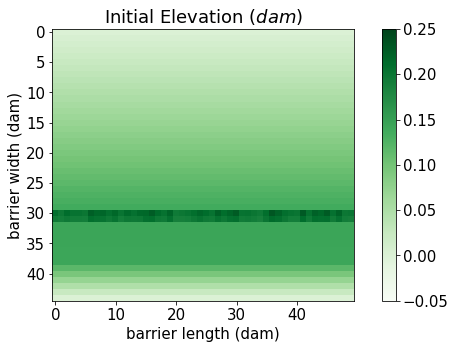

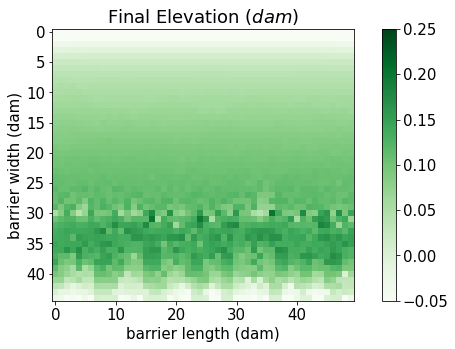

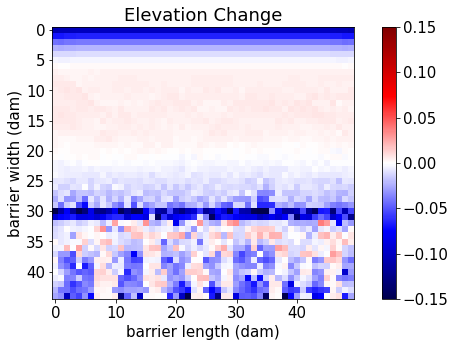

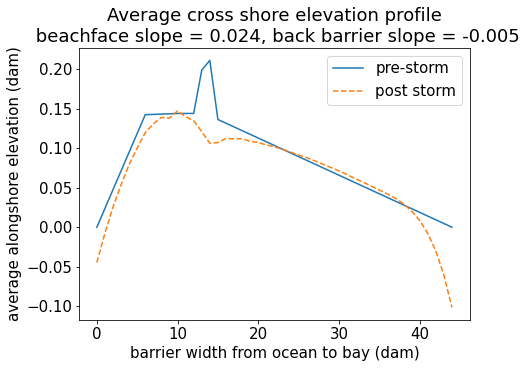

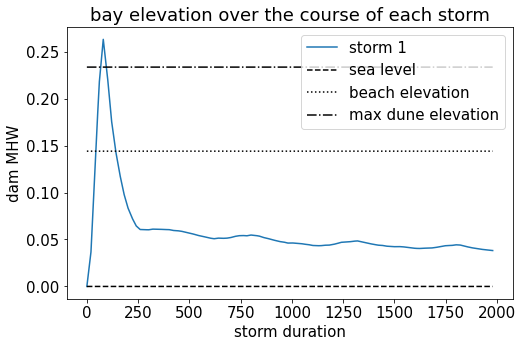

[ * elevation GIF successfully generated * ]

[ * discharge GIF successfully generated * ]

[ * slope GIF successfully generated * ]

[ * SedOut GIF successfully generated * ]

[ * SedIn GIF successfully generated * ]


In [6]:
### GIFS------------------------------------------------------------------------------------------------------------------------

start = OW_TS[0]
stop = OW_TS[-1]
dir = newpath
plot_ElevAnimation(elev_change, dir, start, stop)
plot_DischargeAnimation(discharge, dir, start, stop)
plot_SlopeAnimation(slopes2, dir, start, stop)
# plot_Qs2Animation(qs2, dir, TMAX)
plot_SedOutAnimation(sedout, dir, start, stop)
plot_SedInAnimation(sedin, dir, start, stop)
# time_step = [0]
# plot_ModelTransects(b3d, time_step)